## Web Scraping and Analysis

This Jupyter notebook provides code to facilitate web scraping using the `BeautifulSoup` package. The objective is to gather data from the web, particularly focusing on reviews related to British Airways from the Skytrax website. Once the data is collected and saved into a local `.csv` file, subsequent analysis can be conducted.

### Scraping Data from Skytrax

When visiting [Skytrax]([https://www.airlinequality.com), a wealth of data is available for various airlines. For the task at hand, our focus lies solely on reviews pertaining to British Airways. By navigating to the dedicated link for British Airways reviews on Skytrax [here](https://www.airlinequality.com/airline-reviews/british-airways), one can access the desired data. Utilizing `Python` in conjunction with the `BeautifulSoup` library, we aim to extract all review links and subsequently collect the text data from each individual review link.


In [80]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [52]:


# Define the base URL and parameters for scraping
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

# Lists to store scraped data
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
FoodBeverages = []
Ground_Service = []
df = pd.DataFrame()

# Iterate through each page
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    # Construct the URL for the current page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Send a GET request to the URL
    response = requests.get(url)
    # Extract the content from the response
    content = response.content
    # Parse the HTML content using BeautifulSoup
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract review text from each review block
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    # Extract review ratings and other details
    for para2 in parsed_content.find_all("div", {"class": "review-stats"}):
        rating = []
        category = []
        recomend = ""
        
        # Extract numeric ratings and recommendation status
        for para3 in para2.find_all('td', {'class': 'review-value'}):
            rating.append(para3.get_text())
            if 'recommend' in para3.get_text().lower():
                recomend = para3.get_text()
                
        # Extract star ratings
        for para4 in para2.find_all('td', {'class': 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class': 'star fill'}))
            rating.append(para5)

        # Extract rating categories
        for para6 in para2.find_all('td', {'class': 'review-rating-header'}):
            category.append(para6.get_text().strip())

        # Add recommendation status as a category if present
        if recomend:
            category.append("Recommended")
            rating.append(recomend)

        # Create a dictionary from the extracted data
        data_dict = dict(zip(category, rating))
        # Convert the dictionary to a DataFrame and append it to the main DataFrame
        df = pd.concat([df, pd.DataFrame([data_dict])], ignore_index=True)

    print(f"   ---> {len(reviews)} total reviews")

# Add the 'reviews' column to the dataframe
df["reviews"] = reviews





Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [53]:
df.to_csv("BritishAirways_reviews.csv", index=False)  
# Save the DataFrame to a CSV file without including the index

In [56]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,Boeing 777,Business,Business Class,London to Tokyo,March 2024,yes,5.0,2.0,5.0,5.0,3,4,NaN,✅ Trip Verified | A last minute business trip ...
1,A320,Business,Economy Class,Lisbon to London,March 2024,yes,4.0,NaN,NaN,3.0,1,3,NaN,✅ Trip Verified | Overall I would say disapp...
2,Boeing 777,Couple Leisure,Business Class,London to Delhi,February 2024,yes,5.0,5.0,5.0,5.0,5,5,NaN,Not Verified | LHR to Delhi in Business. Exce...
3,A320,Couple Leisure,Economy Class,London to Milan,March 2024,yes,5.0,5.0,NaN,5.0,4,5,NaN,Not Verified | Efficient and Smooth flight fr...
4,NaN,Couple Leisure,Economy Class,Madrid to London Heathrow,March 2024,no,3.0,NaN,NaN,3.0,3,2,NaN,✅ Trip Verified | Was told we can not take han...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Couple Leisure,Business Class,Bridgetown to Gatwick,March 2019,no,4.0,1.0,NaN,2,4,1,NaN,✅ Trip Verified | Bridgetown to London Gatwic...
996,777,Couple Leisure,Economy Class,St Lucia to Gatwick,April 2019,no,1.0,2.0,1.0,1,1,1,NaN,✅ Trip Verified | St Lucia to Gatwick on whic...
997,A380,Solo Leisure,Economy Class,Chicago to London,April 2019,no,1.0,1.0,NaN,1,1,1,NaN,✅ Trip Verified | Chicago to London. Cancelle...
998,NaN,Family Leisure,Economy Class,London to Bangalore,September 2018,no,3.0,1.0,NaN,1,2,3,NaN,✅ Trip Verified | London to Bangalore. This w...


In the below line of code we are going to perform the following processes:


In [57]:
df = pd.read_csv('BritishAirways_reviews.csv')

In [58]:
print(df.columns)

Index(['Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'Value For Money',
       'Recommended', 'Wifi & Connectivity', 'reviews'],
      dtype='object')


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                534 non-null    object 
 1   Type Of Traveller       998 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   997 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            914 non-null    object 
 6   Cabin Staff Service     907 non-null    float64
 7   Food & Beverages        786 non-null    float64
 8   Inflight Entertainment  520 non-null    float64
 9   Ground Service          943 non-null    object 
 10  Value For Money         1000 non-null   object 
 11  Recommended             1000 non-null   int64  
 12  Wifi & Connectivity     300 non-null    float64
 13  reviews                 1000 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory

In [60]:
null_values = df.isnull().sum()  # Count the number of null values in each column

print("Null values in each column:")
print(null_values)


Null values in each column:
Aircraft                  466
Type Of Traveller           2
Seat Type                   0
Route                       3
Date Flown                  0
Seat Comfort               86
Cabin Staff Service        93
Food & Beverages          214
Inflight Entertainment    480
Ground Service             57
Value For Money             0
Recommended                 0
Wifi & Connectivity       700
reviews                     0
dtype: int64


In [61]:


# Assuming df is your DataFrame with null values
columns_to_fix = ['Ground Service', 'Inflight Entertainment', 'Food & Beverages', 'Cabin Staff Service']

# Convert columns to numeric (if they're not already numeric)
df[columns_to_fix] = df[columns_to_fix].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of specified columns
for column in columns_to_fix:
    df[column].fillna(df[column].mean(), inplace=True)



In [62]:
null_values = df.isnull().sum()  # Count the number of null values in each column

print("Null values in each column:")
print(null_values)

Null values in each column:
Aircraft                  466
Type Of Traveller           2
Seat Type                   0
Route                       3
Date Flown                  0
Seat Comfort               86
Cabin Staff Service         0
Food & Beverages            0
Inflight Entertainment      0
Ground Service              0
Value For Money             0
Recommended                 0
Wifi & Connectivity       700
reviews                     0
dtype: int64


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
print(df.columns)


Index(['Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'Value For Money',
       'Recommended', 'Wifi & Connectivity', 'reviews'],
      dtype='object')


### Recommendation Analysis

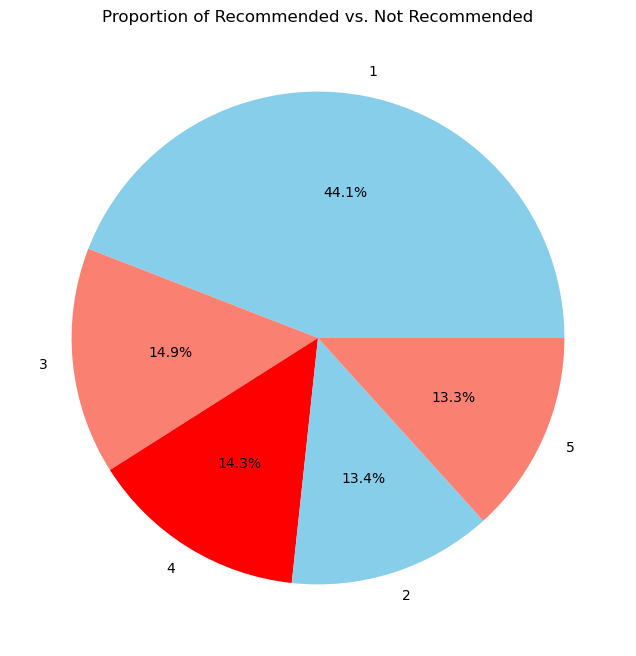

In [65]:
plt.figure(figsize=(8, 8))
df['Recommended'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon','red'])
plt.title('Proportion of Recommended vs. Not Recommended')
plt.ylabel('')
plt.show()


### Route Analysis

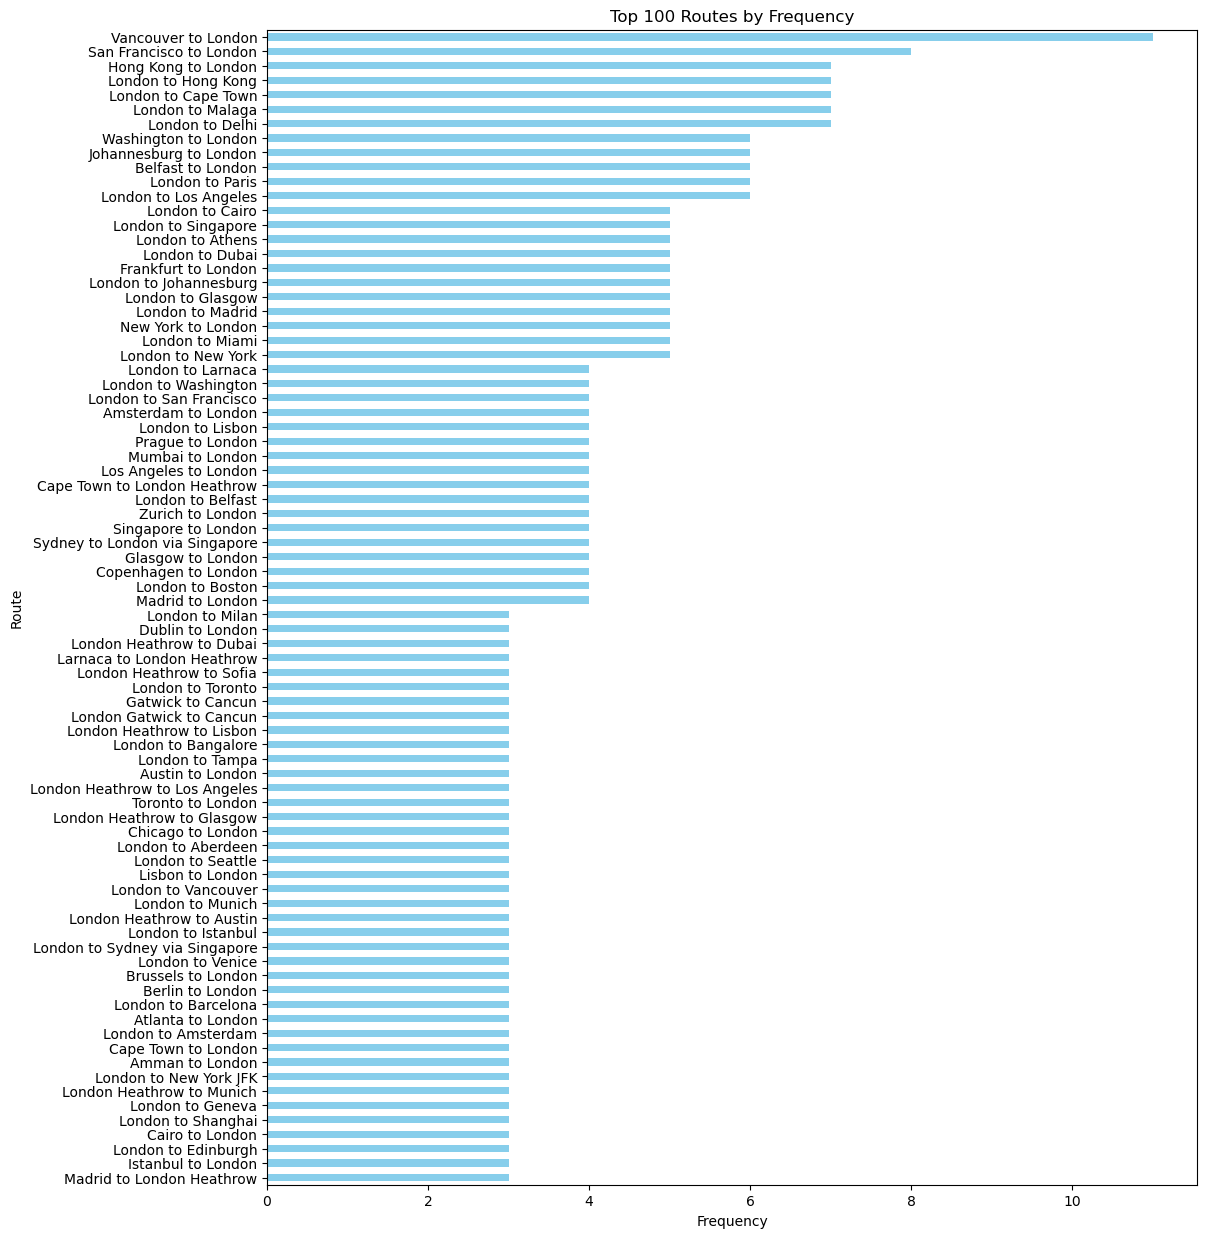

In [66]:
top_routes = df['Route'].value_counts().nlargest(80)

plt.figure(figsize=(12, 15))
top_routes.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Route')
plt.title('Top 100 Routes by Frequency')
plt.show()


### Seat Comfort Analysis
#### The donat pie chart below show the reviews about the comfort of the seat

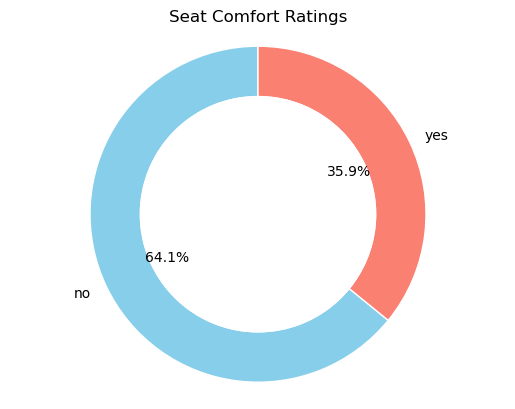

In [71]:
# Count occurrences of 'Yes' and 'No' in the 'Seat Comfort' column
counts = df['Seat Comfort'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the outer pie chart (larger)
outer_colors = ['skyblue', 'salmon']
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=outer_colors, radius=1, startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))

# Plot the inner pie chart (smaller to create the donut)
inner_counts = [1]  # single value for the inner pie chart
inner_colors = ['white']  # color for the inner pie chart
ax.pie(inner_counts, colors=inner_colors, radius=0.7, startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))

# Add a circle at the center to make it look like a donut
center_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=0)
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal, and remove x and y axis labels
ax.axis('equal')
ax.set_xlabel('')
ax.set_ylabel('')

# Set title and show the plot
plt.title('Seat Comfort Ratings')
plt.show()

### A three column bar graph for find the value of money

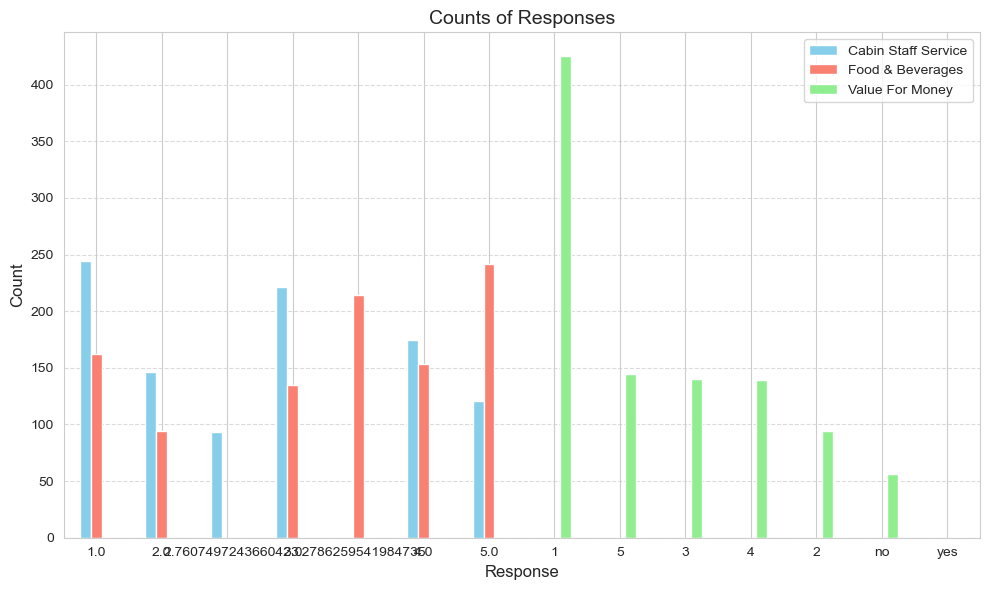

In [76]:
# Count occurrences of each response in the three columns
counts = df[['Cabin Staff Service', 'Food & Beverages', 'Value For Money']].apply(pd.Series.value_counts)

# Set style
sns.set_style('whitegrid')

# Plotting
ax = counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], figsize=(10, 6))

# Adding labels and title
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts of Responses', fontsize=14)

# Customize ticks and gridlines
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove legend title
plt.legend(title='', bbox_to_anchor=(1, 1), fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

### Inflight Entertainment and Wifi Analysis

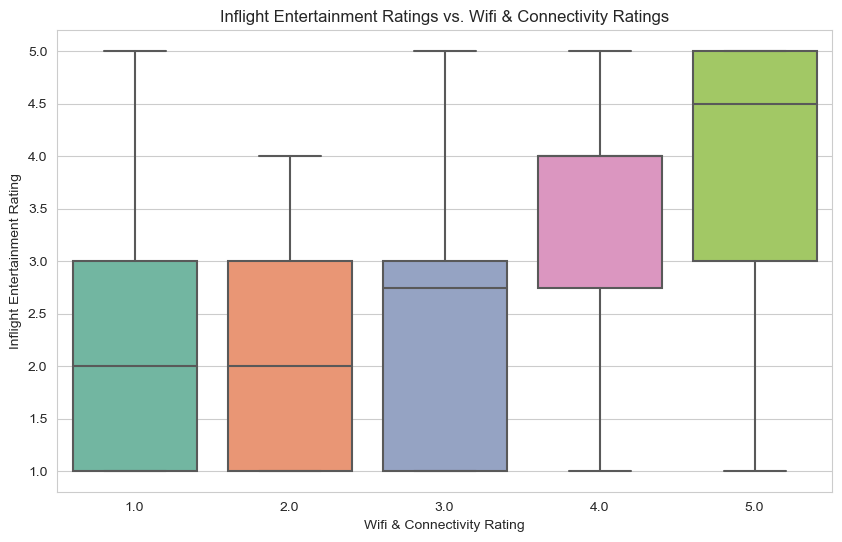

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wifi & Connectivity', y='Inflight Entertainment', data=df, palette='Set2')
plt.xlabel('Wifi & Connectivity Rating')
plt.ylabel('Inflight Entertainment Rating')
plt.title('Inflight Entertainment Ratings vs. Wifi & Connectivity Ratings')
plt.show()


### Correlation Heatmap

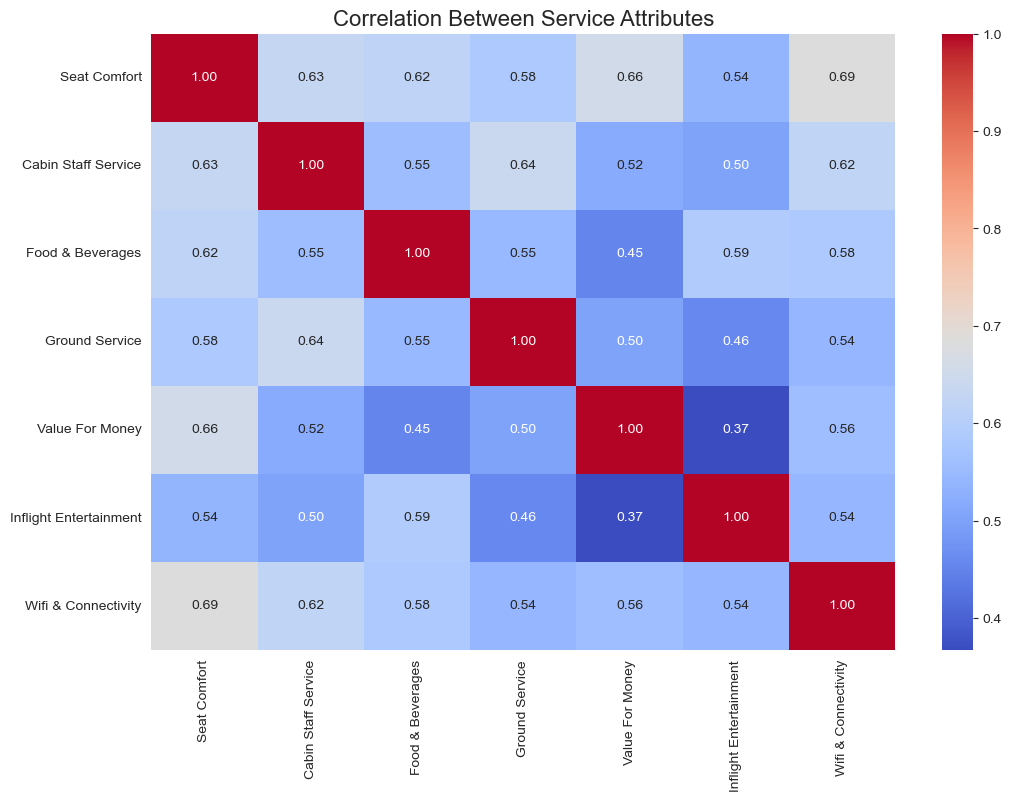

In [79]:
# Convert 'yes' and 'no' to 1 and 0 respectively in relevant columns
df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money', 'Inflight Entertainment', 'Wifi & Connectivity']] = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money', 'Inflight Entertainment', 'Wifi & Connectivity']].replace({'yes': 1, 'no': 0})

# Compute correlation matrix
correlation_data = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money', 'Inflight Entertainment', 'Wifi & Connectivity']].corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Service Attributes', fontsize=16)
plt.show()